# Problem Statement

Please use the Data set below and build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
1. Here you will see some missing value that you need to fill and justify your answer using data visualization
2. Data Cleanup needs to be done prior to using any ML model


# Importing the modules and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
GradientBoostingClassifier, ExtraTreesClassifier,
VotingClassifier)
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
StratifiedKFold, learning_curve)
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
import warnings
from collections import Counter
sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

In [4]:
df = pd.read_csv(r'E:\ML\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [10]:
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    return pd.concat([Total,Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [11]:
find_missing_data(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


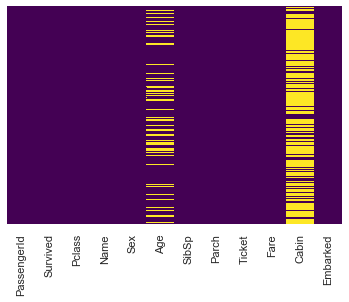

In [13]:
# checking dataset - visualize
sns.heatmap(df.isnull(), cbar = False ,yticklabels = False , cmap = 'viridis')

In [15]:
find_missing_data(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


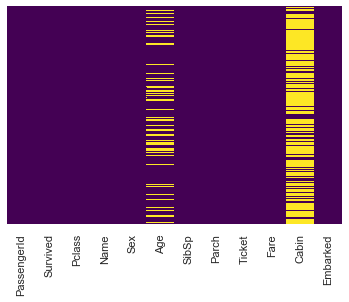

In [16]:
sns.heatmap(df.isnull(), cbar = False ,yticklabels = False , cmap = 'viridis')

# Data Pre-processing and Feature Selection

In [19]:
# Outlier detection
def detect_outliers(df,n,features):
    
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |
        (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_list_col = df[(df[col] < Q1 - outlier_step) |(df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)


    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])
       


In [20]:
df.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


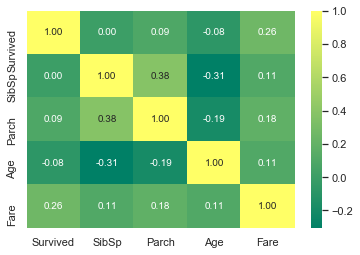

In [24]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived
corr_numeric = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "summer")

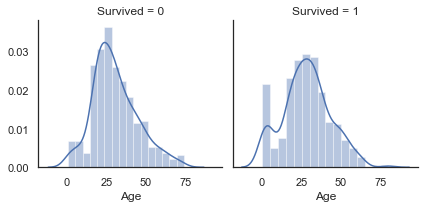

In [26]:
# Explore the Age vs Survived features
age_survived = sns.FacetGrid(df, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")

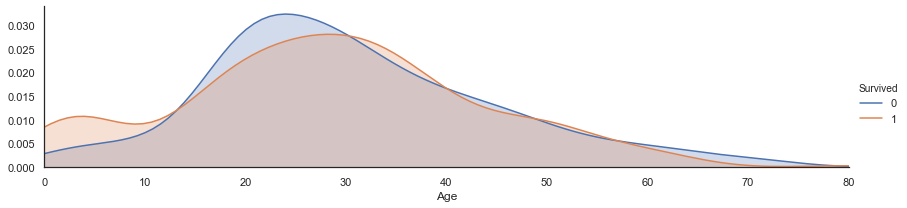

In [28]:
fig = sns.FacetGrid(df, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, df['Age'].max()))
fig.add_legend()

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


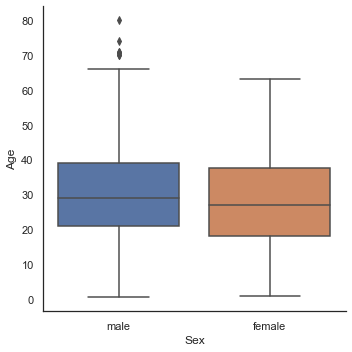

In [29]:
AS = sns.factorplot(y="Age", x="Sex", data = df, kind="box")

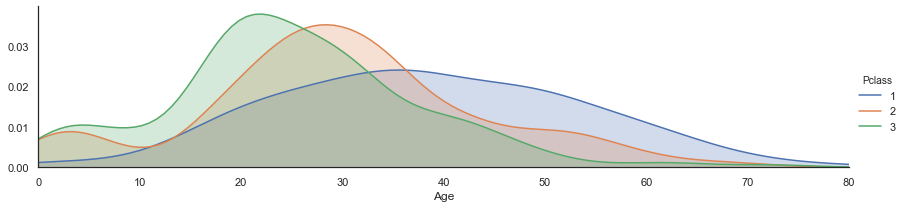

In [30]:
facet = sns.FacetGrid(df, hue="Pclass", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.show()

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


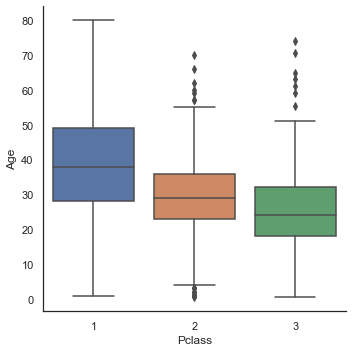

In [31]:
sns.factorplot(data = df , x = 'Pclass' , y = 'Age', kind = 'box')

In [33]:
# a custom function for age imputation
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age
# Age Impute
df['Age'] = df[['Age' , 'Pclass']].apply(AgeImpute, axis = 1)

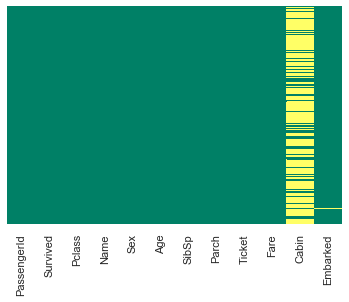

In [34]:
# age featured imputed; no missing age records
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'summer')

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


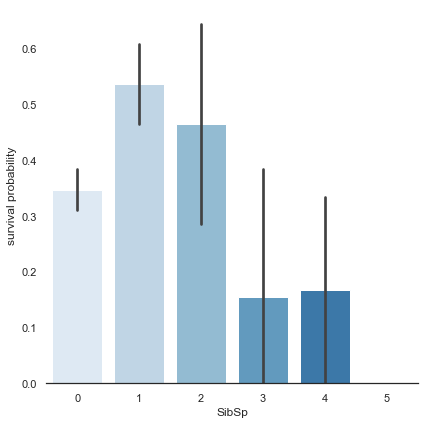

In [36]:
# Explore SibSp feature vs Survived
# We'll use factorplot to analysis
Sib_Sur = sns.factorplot(x="SibSp",y="Survived",data=df,
kind="bar", size = 6 , palette = "Blues")
Sib_Sur.despine(left=True)
Sib_Sur = Sib_Sur.set_ylabels("survival probability")

In [ ]:
# Explore Parch feature vs Survived
# We'll use factorplot to analysis
Sur_Par = sns.factorplot(x="Parch",y="Survived",data=train,
kind="bar", size = 6 , palette = "GnBu_d")
Sur_Par.despine(left=True)
Sur_Par = Sur_Par.set_ylabels("survival probability")
In [32]:
dataset["Fare"].isnull().sum() # 1
In [33]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())
In [34]:
print(dataset['Sex'].head()) # top 5
print(' ')
print(dataset['Sex'].tail()) # last 5
Out[32]:

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


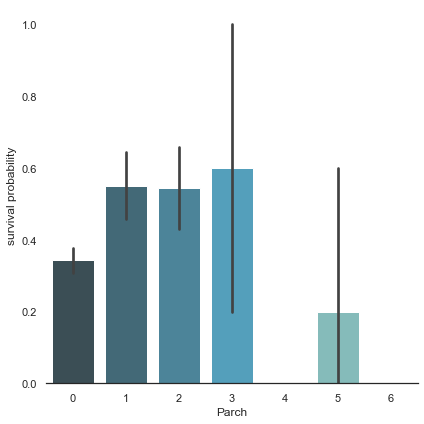

In [37]:
# Explore Parch feature vs Survived
# We'll use factorplot to analysis
Sur_Par = sns.factorplot(x="Parch",y="Survived",data=df,
kind="bar", size = 6 , palette = "GnBu_d")
Sur_Par.despine(left=True)
Sur_Par = Sur_Par.set_ylabels("survival probability")

In [38]:
df["Fare"].isnull().sum() # 1

0

In [39]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

In [40]:
print(df['Sex'].head()) # top 5
print(' ')
print(df['Sex'].tail()) # last 5

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
 
876      male
877    female
878    female
879      male
880      male
Name: Sex, dtype: object


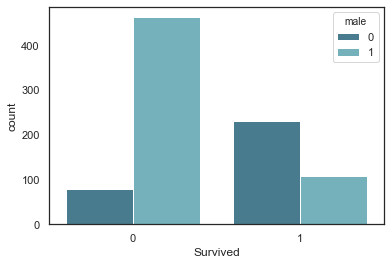

In [51]:
# using countplot to estimate amount
sns.countplot(data = df , x = 'Survived' , hue = 'male', palette = 'GnBu_d')

In [53]:
# let's see the percentage
df[["male","Survived"]].groupby('male').mean()

,Survived
male,
0,0.747573
1,0.190559


male(0) here means Female, therefore female survived=0.747573 and Male survived rate=0.190559

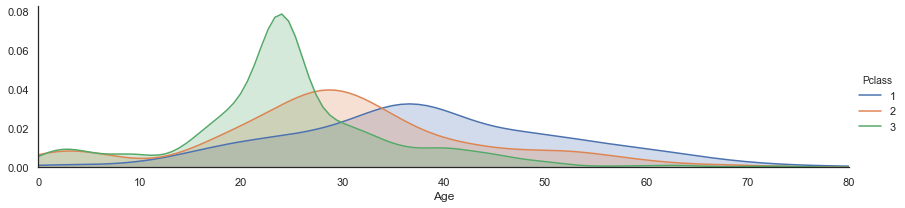

In [55]:
facet = sns.FacetGrid(df, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.show()

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


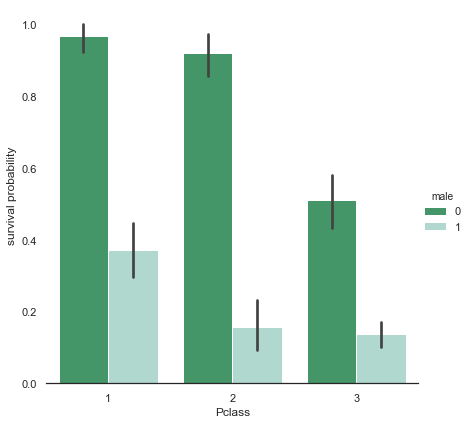

In [56]:
Survived_Pcalss = sns.factorplot(x="Pclass", y="Survived",hue="male", data=df,size=6,kind="bar", palette="BuGn_r")
Survived_Pcalss.despine(left=True)
Survived_Pcalss = Survived_Pcalss.set_ylabels("survival probability")

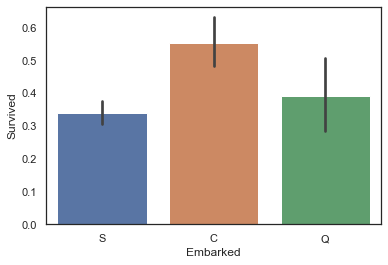

In [57]:
# 'Embarked' vs 'Survived'
sns.barplot(df['Embarked'], df['Survived']);

In [58]:
# Count
print(df.groupby(['Embarked'])['PassengerId'].count())
# Compare with other variables
df.groupby(['Embarked']).mean()

Embarked
C    168
Q     77
S    634
Name: PassengerId, dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,30.184048,0.386905,0.363095,59.954144,0.565476
Q,417.896104,0.389610,2.909091,25.551948,0.428571,0.168831,13.276030,0.532468
S,450.575710,0.339117,2.350158,29.220426,0.477918,0.388013,25.494556,0.687697


2


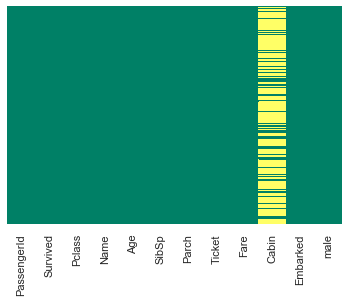

In [59]:
# count missing values
print(df["Embarked"].isnull().sum()) # 2
# Fill Embarked nan values of dataset set with 'S' most frequent value
df["Embarked"] = df["Embarked"].fillna("S")
# let's visualize it to confirm
sns.heatmap(df.isnull(), yticklabels = False,
cbar = False, cmap = 'summer')

C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Nitin\anaconda3 new\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


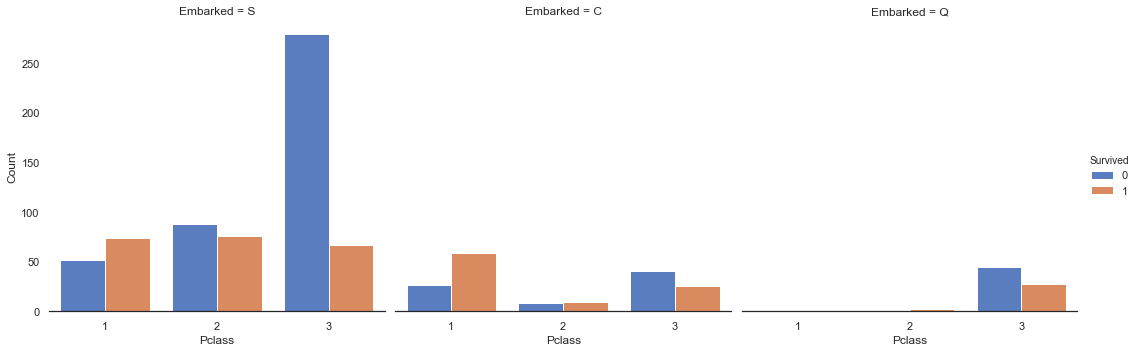

In [60]:
# Counting passenger based on Pclass and Embarked
Embarked_Pc = sns.factorplot("Pclass", col="Embarked", data=df,
size=5, kind="count", palette="muted", hue = 'Survived')
Embarked_Pc.despine(left=True)
Embarked_Pc = Embarked_Pc.set_ylabels("Count")

In [62]:
# create dummy variable
embarked = pd.get_dummies(df['Embarked'], drop_first = True)
df = pd.concat([df,embarked], axis = 1)
# after now, we don't need Embarked coloumn anymore, so we can drop it.
df.drop(['Embarked'] , axis = 1 , inplace = True)

In [63]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [64]:
# Get Title from Name
df_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
# add dataset_title to the main dataset named 'Title'
df["Title"] = pd.Series(df_title)
# count
df["Title"].value_counts()

Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Lady              1
Sir               1
Ms                1
Capt              1
the Countess      1
Don               1
Mme               1
Name: Title, dtype: int64

Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              41.285714
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           6.068462
Miss            22.299435
Mlle            24.000000
Mme             24.000000
Mr              31.096491
Mrs             35.112000
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


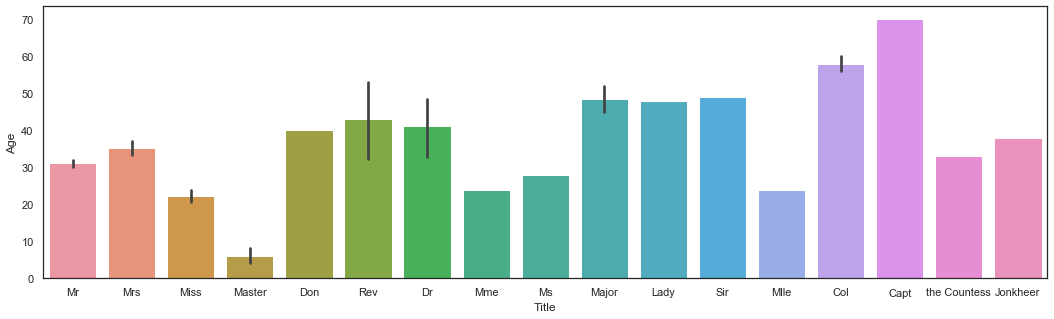

In [65]:
# Plot bar plot (titles and Age)
plt.figure(figsize=(18,5))
sns.barplot(x=df['Title'], y = df['Age'])
# Means per title
print(df.groupby('Title')['Age'].mean())

In [66]:
# Convert to categorical values Title
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,"Mme":1, "Mlle":1, "Mrs":1, "Mr":2,"Rare":3})
df["Title"] = df["Title"].astype(int)
# Drop Name variable
df.drop(labels = ["Name"], axis = 1, inplace = True)

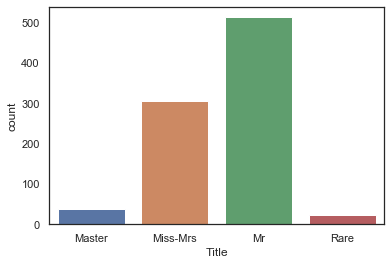

In [67]:
sns.countplot(df["Title"]).set_xticklabels(["Master","Miss-Mrs","Mr","Rare"]);

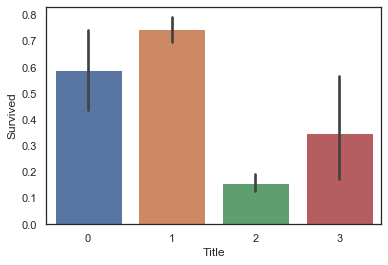

In [68]:
# Let's see, based on title what's the survival probability
sns.barplot(x='Title', y='Survived', data=df);

In [70]:
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,Title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,2
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,1,0,1,2


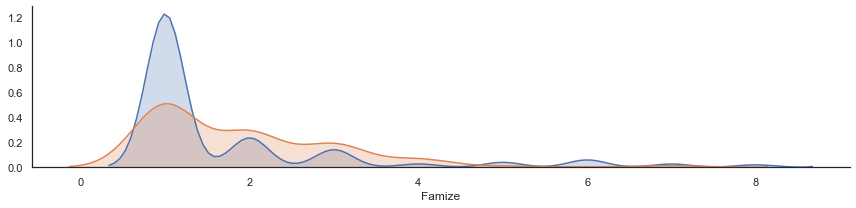

In [71]:
# Create a family size descriptor from SibSp and Parch
df["Famize"] = df["SibSp"] + df["Parch"] + 1
# Drop SibSp and Parch variables
df.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)
# Viz the survival probabily of Famize feature
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Famize',shade= True)


In [72]:
# drop some useless features
df.drop(labels = ["Ticket",'Cabin','PassengerId'], axis = 1,inplace = True)

In [77]:
Y_train = df["Survived"].astype(int)
X_train = df.drop(labels = ["Survived"],axis = 1)
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

# Supervised Learning Algorithms

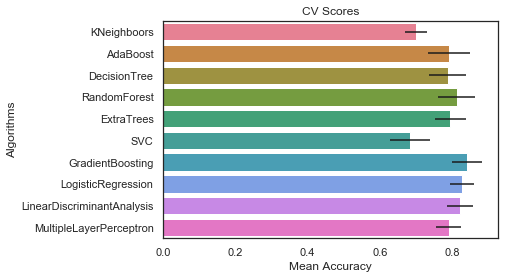

In [78]:
# Modeling step Test differents algorithms
random_state = 2
models = [] # append all models or predictive models
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation
models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))
for model in models :
    cv_results.append(cross_val_score(model, X_train, Y_train,
    scoring = "accuracy", cv = K_fold, n_jobs=4))
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                    "KNeighboors",
                    "AdaBoost",
                    "DecisionTree",
                    "RandomForest",
                    "ExtraTrees",
                    "SVC",
                    "GradientBoosting",
                    "LogisticRegression",
                    "LinearDiscriminantAnalysis",
                    "MultipleLayerPerceptron"]
    })
cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
palette="husl", orient = "h", **{'xerr':cv_std})
cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [79]:
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold,
n_jobs=4, scoring='accuracy')
print(scores)
round(np.mean(scores)*100, 2)

[0.82022472 0.85227273 0.77272727 0.88636364 0.82954545 0.79545455
 0.79545455 0.80681818 0.85227273 0.86363636]


82.75